In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
ML = pd.read_csv('models/best_models_per_sku_ML.csv')
trad = pd.read_csv('models/best_methods_per_sku_trad.csv')
sku_data = pd.read_csv("models/sku_data.csv")


print("NaN values in ML:")
print(ML[['SKU', 'MSE']].isna().sum())
print("NaN values in trad:")
print(trad[['SKU', 'MSE']].isna().sum())

# Concatenate and handle NaN values
combined_results = pd.concat([ML, trad], ignore_index=True)
combined_results = combined_results.dropna(subset=['SKU', 'MSE'])  # Drop rows where 'SKU' or 'MSE' is NaN
combined_results = combined_results[combined_results['MSE'] != 0]

# Select the model with the lowest MSE for each SKU
best_overall_methods = combined_results.loc[combined_results.groupby('SKU')['MSE'].idxmin()]

# Sort and reset index
best_overall_methods = best_overall_methods.sort_values('SKU')
best_overall_methods.reset_index(drop=True, inplace=True)

# Print results
print(best_overall_methods[['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2']])

# Save results
best_overall_methods.to_csv('models/combined_results.csv', index=False)


NaN values in ML:
SKU    0
MSE    0
dtype: int64
NaN values in trad:
SKU    0
MSE    0
dtype: int64
            SKU                                         Model         MSE  \
0     0003705-S                                           SVR    0.552663   
1     0003710-S                                         Ridge   20.921578   
2     0003711-S                                         Ridge    2.486478   
3     0003714-S  Exponential Smoothing w/ Trend & Seasonality    0.424825   
4     0003715-S                   Second Degree Approximation    0.224406   
...         ...                                           ...         ...   
1691  86804NP-X                   Second Degree Approximation    0.064504   
1692  C059053-A                                 Random Forest    1.298840   
1693  C059195-A                                           SVR    0.011791   
1694  C358991-A                                           SVR    0.150324   
1695  L058141-A                                      

In [38]:
print(best_overall_methods)

            SKU                                         Model         MSE  \
0     0003705-S                                           SVR    0.552663   
1     0003710-S                                         Ridge   20.921578   
2     0003711-S                                         Ridge    2.486478   
3     0003714-S  Exponential Smoothing w/ Trend & Seasonality    0.424825   
4     0003715-S                   Second Degree Approximation    0.224406   
...         ...                                           ...         ...   
1691  86804NP-X                   Second Degree Approximation    0.064504   
1692  C059053-A                                 Random Forest    1.298840   
1693  C059195-A                                           SVR    0.011791   
1694  C358991-A                                           SVR    0.150324   
1695  L058141-A                                           SVR  148.657921   

           RMSE       MAE        R2  Percent Change  Difference  
0      0.

In [39]:
df = best_overall_methods.copy()
df.shape

(1696, 8)

In [40]:
df.describe

<bound method NDFrame.describe of             SKU                                         Model         MSE  \
0     0003705-S                                           SVR    0.552663   
1     0003710-S                                         Ridge   20.921578   
2     0003711-S                                         Ridge    2.486478   
3     0003714-S  Exponential Smoothing w/ Trend & Seasonality    0.424825   
4     0003715-S                   Second Degree Approximation    0.224406   
...         ...                                           ...         ...   
1691  86804NP-X                   Second Degree Approximation    0.064504   
1692  C059053-A                                 Random Forest    1.298840   
1693  C059195-A                                           SVR    0.011791   
1694  C358991-A                                           SVR    0.150324   
1695  L058141-A                                           SVR  148.657921   

           RMSE       MAE        R2  Perc

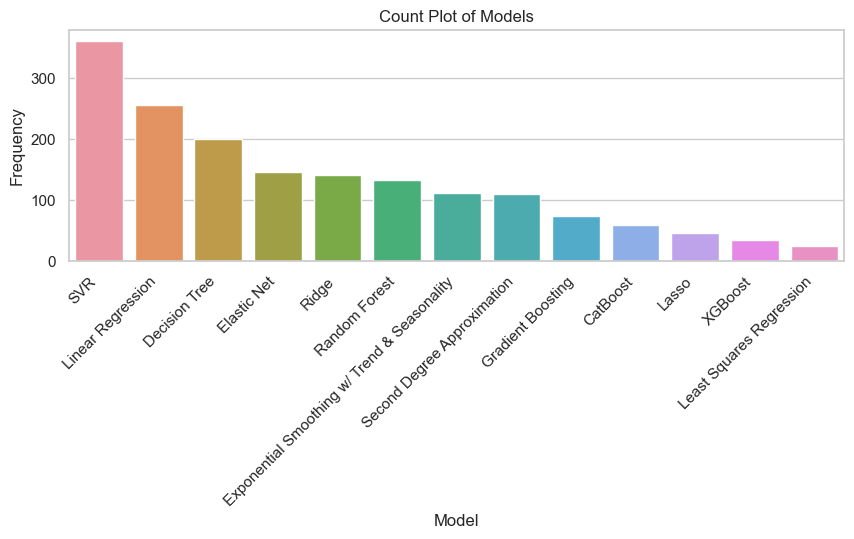

In [41]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")


plt.figure(figsize=(10, 3))  
sku_plot = sns.countplot(x='Model', data=df, order = df['Model'].value_counts().index)

# Improve the readability of the plot
sku_plot.set_xticklabels(sku_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
sku_plot.set_title('Count Plot of Models')
sku_plot.set_xlabel('Model')
sku_plot.set_ylabel('Frequency')

# Show the plot
plt.show()

In [5]:
df[df['Model'] == "SVR"]

,SKU,Model,MSE,RMSE,MAE,R2,Percent Change,Difference
0,0003705-S,SVR,0.552663,0.743413,0.440271,0.342068,NaN,NaN
9,0004370-S,SVR,336.071131,18.332243,10.992043,0.012243,NaN,NaN
12,0004610-S,SVR,2.188711,1.479429,1.259958,0.285021,NaN,NaN
15,0004657-X,SVR,5.116439,2.261955,1.271401,0.092651,NaN,NaN
16,0004658-X,SVR,5.078409,2.253533,1.274024,0.099395,NaN,NaN
...,...,...,...,...,...,...,...,...
1686,86780NP-X,SVR,143.895365,11.995639,9.617953,0.137027,NaN,NaN
1687,86783BU-X,SVR,0.696035,0.834287,0.480401,0.064220,NaN,NaN
1695,C059195-A,SVR,0.011791,0.108585,0.107545,0.926308,NaN,NaN
1696,C358991-A,SVR,0.150324,0.387716,0.323285,0.781347,NaN,NaN


In [6]:
df.describe()

,MSE,RMSE,MAE,R2,Percent Change,Difference
count,1.698000e+03,1698.000000,1698.000000,1.698000e+03,0.0,0.0
mean,2.191352e+02,5.595174,3.853492,1.676088e-01,NaN,NaN
std,1.634645e+03,13.709118,9.423501,1.902731e-01,NaN,NaN
min,1.616789e-10,0.000013,0.000011,2.220446e-16,NaN,NaN
25%,4.305830e-01,0.656188,0.421057,2.772734e-02,NaN,NaN
50%,3.001789e+00,1.732567,1.178265,9.622672e-02,NaN,NaN
75%,1.718727e+01,4.145753,2.865907,2.436703e-01,NaN,NaN
max,3.471139e+04,186.309942,137.647294,1.000000e+00,NaN,NaN


In [7]:
df.columns

Index(['SKU', 'Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Percent Change',
       'Difference'],
      dtype='object')

In [8]:
for val in df.columns:
    print(df[df[val] == 0])

Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []
Empty DataFrame
Columns: [SKU, Model, MSE, RMSE, MAE, R2, Percent Change, Difference]
Index: []


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

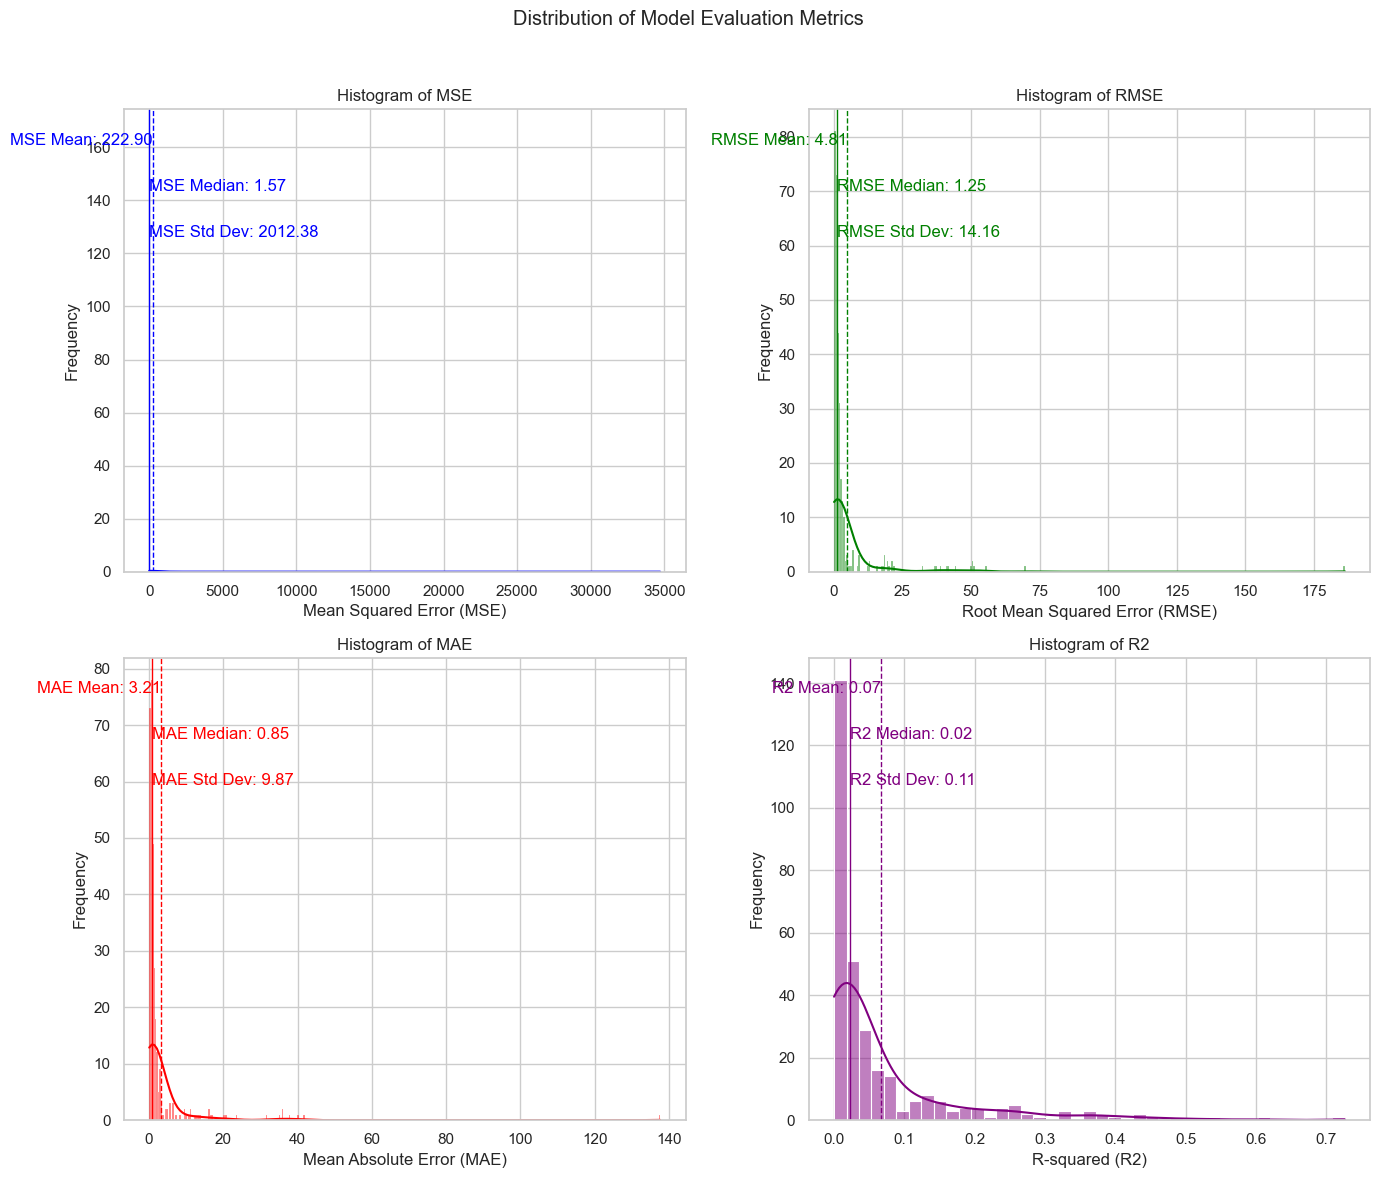

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the results from a CSV file
results = pd.read_csv('models/best_methods_per_sku_trad.csv')  # Adjust this path as necessary

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid of plots, with custom figure size
fig.suptitle('Distribution of Model Evaluation Metrics')

# Function to add mean, median lines, and text annotations
def add_stats_lines(ax, data, color, label):
    mean_val = data.mean()
    median_val = data.median()
    std_dev = data.std()
    ax.axvline(mean_val, color=color, linestyle='dashed', linewidth=1)
    ax.axvline(median_val, color=color, linestyle='solid', linewidth=1)
    ylim = ax.get_ylim()
    ax.text(mean_val, ylim[1] * 0.95, f'{label} Mean: {mean_val:.2f}', color=color, ha='right', va='top')
    ax.text(median_val, ylim[1] * 0.85, f'{label} Median: {median_val:.2f}', color=color, ha='left', va='top')
    ax.text(median_val, ylim[1] * 0.75, f'{label} Std Dev: {std_dev:.2f}', color=color, ha='left', va='top')

# Plot each metric in a subplot
sns.histplot(data=results, x='MSE', ax=axes[0, 0], color='blue', kde=True)
add_stats_lines(axes[0, 0], results['MSE'], 'blue', 'MSE')
axes[0, 0].set_title('Histogram of MSE')
axes[0, 0].set_xlabel('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data=results, x='RMSE', ax=axes[0, 1], color='green', kde=True)
add_stats_lines(axes[0, 1], results['RMSE'], 'green', 'RMSE')
axes[0, 1].set_title('Histogram of RMSE')
axes[0, 1].set_xlabel('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(data=results, x='MAE', ax=axes[1, 0], color='red', kde=True)
add_stats_lines(axes[1, 0], results['MAE'], 'red', 'MAE')
axes[1, 0].set_title('Histogram of MAE')
axes[1, 0].set_xlabel('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(data=results, x='R2', ax=axes[1, 1], color='purple', kde=True)
add_stats_lines(axes[1, 1], results['R2'], 'purple', 'R2')
axes[1, 1].set_title('Histogram of R2')
axes[1, 1].set_xlabel('R-squared (R2)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to not overlap text
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [10]:
stats_mse = results['MSE'].agg(['mean', 'median', 'std'])
stats_rmse = results['RMSE'].agg(['mean', 'median', 'std'])
stats_mae = results['MAE'].agg(['mean', 'median', 'std'])
stats_r2 = results['R2'].agg(['mean', 'median', 'std'])

# Display the statistics
print("Descriptive Statistics for MSE:")
print(stats_mse)
print("\nDescriptive Statistics for RMSE:")
print(stats_rmse)
print("\nDescriptive Statistics for MAE:")
print(stats_mae)
print("\nDescriptive Statistics for R2:")
print(stats_r2)

Descriptive Statistics for MSE:
mean       222.902728
median       1.571252
std       2012.380557
Name: MSE, dtype: float64

Descriptive Statistics for RMSE:
mean       4.806308
median     1.253493
std       14.157700
Name: RMSE, dtype: float64

Descriptive Statistics for MAE:
mean      3.207363
median    0.851181
std       9.867485
Name: MAE, dtype: float64

Descriptive Statistics for R2:
mean      0.066729
median    0.022125
std       0.108214
Name: R2, dtype: float64


In [11]:
df[df['R2'] > .6]

,SKU,Model,MSE,RMSE,MAE,R2,Percent Change,Difference
10,0004597-S,Random Forest,8.989919e+00,2.998319,2.346088,0.623212,NaN,NaN
31,0004780-S,Decision Tree,1.800000e+00,1.341641,0.600000,0.758065,NaN,NaN
76,0004982-S,CatBoost,1.541044e+00,1.241388,1.010625,0.653265,NaN,NaN
91,0005210-S,CatBoost,9.421285e+00,3.069411,2.204815,0.660834,NaN,NaN
126,0010108-S,CatBoost,4.977652e+00,2.231065,2.104329,0.669039,NaN,NaN
...,...,...,...,...,...,...,...,...
1653,3178114-S,SVR,1.552610e-01,0.394032,0.325719,0.774166,NaN,NaN
1656,3333245-S,XGBoost,4.409860e-07,0.000664,0.000647,0.999998,NaN,NaN
1668,85809BU-X,CatBoost,1.028805e+00,1.014300,0.812473,0.640199,NaN,NaN
1695,C059195-A,SVR,1.179076e-02,0.108585,0.107545,0.926308,NaN,NaN


In [12]:
print(df)

            SKU                                         Model         MSE  \
0     0003705-S                                           SVR    0.552663   
1     0003710-S                                         Ridge   20.921578   
2     0003711-S                                         Ridge    2.486478   
3     0003714-S  Exponential Smoothing w/ Trend & Seasonality    0.424825   
4     0003715-S                   Second Degree Approximation    0.224406   
...         ...                                           ...         ...   
1693  86804BU-X                                 Random Forest    2.543573   
1694  86804NP-X                   Second Degree Approximation    0.064504   
1695  C059195-A                                           SVR    0.011791   
1696  C358991-A                                           SVR    0.150324   
1697  L058141-A                                           SVR  148.657921   

           RMSE       MAE        R2  Percent Change  Difference  
0      0.

         SKU                                         Model  Daily Volume  \
0  0003705-S                                           SVR      0.528168   
1  0003710-S                                         Ridge      0.490999   
2  0003711-S                                         Ridge      0.441033   
3  0003714-S  Exponential Smoothing w/ Trend & Seasonality      0.562453   
4  0003715-S                   Second Degree Approximation      0.463951   

   Weekly Volume  Monthly Volume  
0       3.697174       15.845033  
1       3.436992       14.729966  
2       3.087234       13.231002  
3       3.937172       16.873595  
4       3.247656       13.918527  


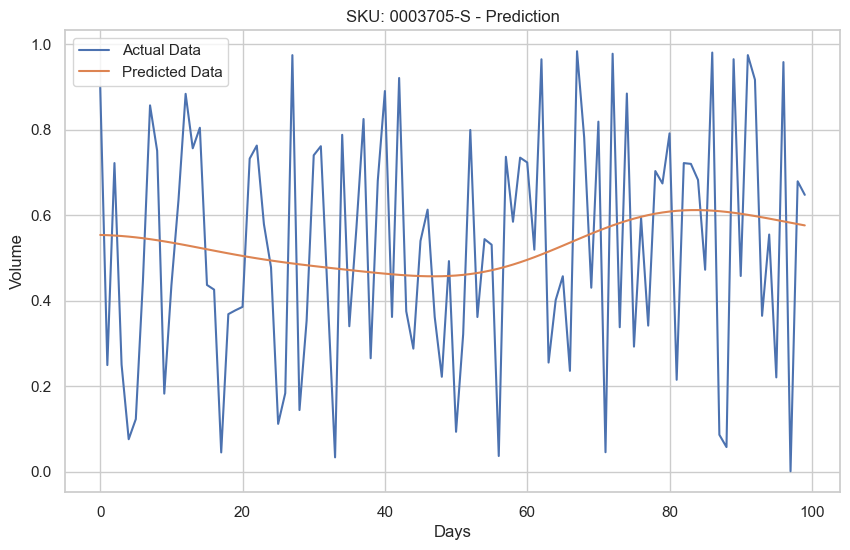

         SKU  Daily Volume (units)  Weekly Volume (units)  \
0  0003705-S              0.528168               3.697174   
1  0003710-S              0.490999               3.436992   
2  0003711-S              0.441033               3.087234   
3  0003714-S              0.562453               3.937172   
4  0003715-S              0.463951               3.247656   

   Monthly Volume (units)  
0               15.845033  
1               14.729966  
2               13.231002  
3               16.873595  
4               13.918527  


In [28]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data
data = {
    'SKU': ['0003705-S', '0003710-S', '0003711-S', '0003714-S', '0003715-S'],
    'Model': ['SVR', 'Ridge', 'Ridge', 'Exponential Smoothing w/ Trend & Seasonality', 'Second Degree Approximation'],
    'MSE': [0.552663, 20.921578, 2.486478, 0.424825, 0.224406],
    'RMSE': [0.743413, 4.574011, 1.576857, 0.651786, 0.473715],
    'MAE': [0.440271, 3.840153, 1.188484, 0.413459, 0.271247],
    'R2': [0.342068, 0.334388, 0.358584, 0.370216, 0.058018]
}
df = pd.DataFrame(data)

# Example SKU data (replace with your actual SKU data)
sku_data = {
    '0003705-S': np.random.rand(100),
    '0003710-S': np.random.rand(100),
    '0003711-S': np.random.rand(100),
    '0003714-S': np.random.rand(100),
    '0003715-S': np.random.rand(100)
}

# Define a function to run the best-performing model for each SKU and summarize predictions
def run_best_model(df, sku_data):
    results = []
    predictions = {}
    
    for index, row in df.iterrows():
        sku = row['SKU']
        model_name = row['Model']
        data = sku_data[sku]

        if model_name == 'SVR':
            model = SVR()
        elif model_name == 'Ridge':
            model = Ridge()
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)
        elif model_name == 'Random Forest':
            model = RandomForestRegressor()
        elif model_name == 'Second Degree Approximation':
            model = np.poly1d(np.polyfit(range(len(data)), data, 2))
        else:
            print(f"Unknown model type: {model_name}")
            continue

        if model_name in ['SVR', 'Ridge', 'Random Forest']:
            model.fit(np.arange(len(data)).reshape(-1, 1), data)
            prediction = model.predict(np.arange(len(data)).reshape(-1, 1))
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model_fit = model.fit()
            prediction = model_fit.fittedvalues
        elif model_name == 'Second Degree Approximation':
            prediction = model(range(len(data)))

        # Store the predictions for plotting
        predictions[sku] = prediction

        # Daily, weekly, and monthly summaries
        daily_summary = np.mean(prediction)
        weekly_summary = daily_summary * 7
        monthly_summary = daily_summary * 30

        results.append({
            'SKU': sku,
            'Model': model_name,
            'Daily Volume': daily_summary,
            'Weekly Volume': weekly_summary,
            'Monthly Volume': monthly_summary
        })

    return pd.DataFrame(results), predictions

# Run the best-performing model for each SKU and summarize predictions
best_model_results, predictions = run_best_model(df, sku_data)

# Display the summarized results
print(best_model_results)

# Plotting the predictions for visualization
def plot_predictions(sku, data, prediction):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Actual Data')
    plt.plot(prediction, label='Predicted Data')
    plt.title(f'SKU: {sku} - Prediction')
    plt.xlabel('Days')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Example: Plotting for the first SKU
sku_example = '0003705-S'
plot_predictions(sku_example, sku_data[sku_example], predictions[sku_example])

# Display summarized recommendations in a customer-friendly table
def display_recommendations(results):
    summary_table = results[['SKU', 'Daily Volume', 'Weekly Volume', 'Monthly Volume']]
    summary_table.columns = ['SKU', 'Daily Volume (units)', 'Weekly Volume (units)', 'Monthly Volume (units)']
    print(summary_table)

display_recommendations(best_model_results)






In [27]:
best_model_results


,SKU,Model,Daily Volume,Weekly Volume,Monthly Volume
0,0003705-S,SVR,0.414574,2.902015,12.437208
1,0003710-S,Ridge,0.481343,3.369403,14.440299
2,0003711-S,Ridge,0.509405,3.565838,15.282162
3,0003714-S,Exponential Smoothing w/ Trend & Seasonality,0.476334,3.334340,14.290028
4,0003715-S,Second Degree Approximation,0.503503,3.524522,15.105095


         SKU                                         Model  Daily Volume  \
0  0003705-S                                           SVR      0.465635   
1  0003710-S                                         Ridge      0.521261   
2  0003711-S                                         Ridge      0.458792   
3  0003714-S  Exponential Smoothing w/ Trend & Seasonality      0.525186   
4  0003715-S                   Second Degree Approximation      0.486730   

   Weekly Volume  Monthly Volume  
0       3.259443       13.969042  
1       3.648830       15.637845  
2       3.211545       13.763764  
3       3.676303       15.755584  
4       3.407112       14.601910  


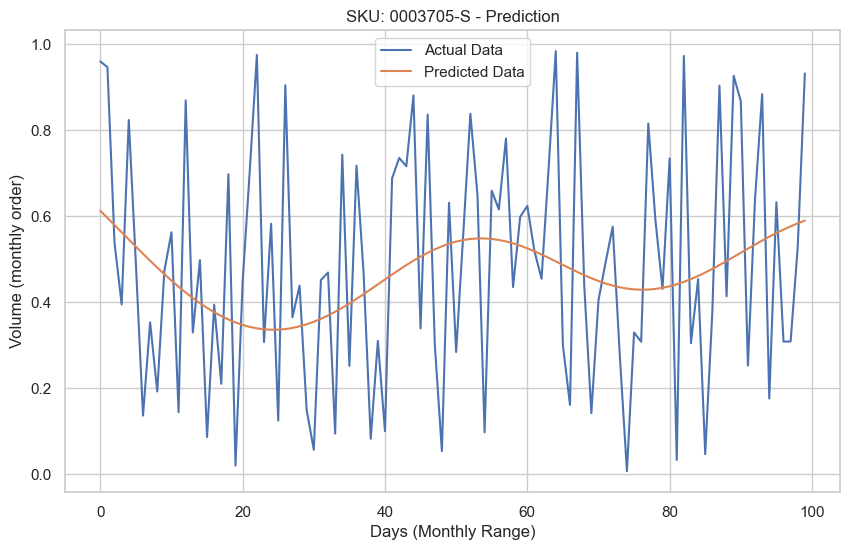

         SKU  Daily Volume (units)  Weekly Volume (units)  \
0  0003705-S              0.465635               3.259443   
1  0003710-S              0.521261               3.648830   
2  0003711-S              0.458792               3.211545   
3  0003714-S              0.525186               3.676303   
4  0003715-S              0.486730               3.407112   

   Monthly Volume (units)  
0               13.969042  
1               15.637845  
2               13.763764  
3               15.755584  
4               14.601910  


In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data
data = {
    'SKU': ['0003705-S', '0003710-S', '0003711-S', '0003714-S', '0003715-S'],
    'Model': ['SVR', 'Ridge', 'Ridge', 'Exponential Smoothing w/ Trend & Seasonality', 'Second Degree Approximation'],
    'MSE': [0.552663, 20.921578, 2.486478, 0.424825, 0.224406],
    'RMSE': [0.743413, 4.574011, 1.576857, 0.651786, 0.473715],
    'MAE': [0.440271, 3.840153, 1.188484, 0.413459, 0.271247],
    'R2': [0.342068, 0.334388, 0.358584, 0.370216, 0.058018]
}
df = pd.DataFrame(data)

# Example SKU data (replace with your actual SKU data)
sku_data = {
    '0003705-S': np.random.rand(100),
    '0003710-S': np.random.rand(100),
    '0003711-S': np.random.rand(100),
    '0003714-S': np.random.rand(100),
    '0003715-S': np.random.rand(100)
}

# Define a function to run the best-performing model for each SKU and summarize predictions
def run_best_model(df, sku_data):
    results = []
    predictions = {}
    
    for index, row in df.iterrows():
        sku = row['SKU']
        model_name = row['Model']
        data = sku_data[sku]

        if model_name == 'SVR':
            model = SVR()
        elif model_name == 'Ridge':
            model = Ridge()
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)
        elif model_name == 'Random Forest':
            model = RandomForestRegressor()
        elif model_name == 'Second Degree Approximation':
            model = np.poly1d(np.polyfit(range(len(data)), data, 2))
        else:
            print(f"Unknown model type: {model_name}")
            continue

        if model_name in ['SVR', 'Ridge', 'Random Forest']:
            model.fit(np.arange(len(data)).reshape(-1, 1), data)
            prediction = model.predict(np.arange(len(data)).reshape(-1, 1))
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model_fit = model.fit()
            prediction = model_fit.fittedvalues
        elif model_name == 'Second Degree Approximation':
            prediction = model(range(len(data)))

        # Store the predictions for plotting
        predictions[sku] = prediction

        # Daily, weekly, and monthly summaries
        daily_summary = np.mean(prediction)
        weekly_summary = daily_summary * 7
        monthly_summary = daily_summary * 30

        results.append({
            'SKU': sku,
            'Model': model_name,
            'Daily Volume': daily_summary,
            'Weekly Volume': weekly_summary,
            'Monthly Volume': monthly_summary
        })

    return pd.DataFrame(results), predictions

# Run the best-performing model for each SKU and summarize predictions
best_model_results, predictions = run_best_model(df, sku_data)

# Display the summarized results
print(best_model_results)

# Plotting the predictions for visualization
def plot_predictions(sku, data, prediction):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Actual Data')
    plt.plot(prediction, label='Predicted Data')
    plt.title(f'SKU: {sku} - Prediction')
    plt.xlabel('Days (Monthly Range)')
    plt.ylabel('Volume (monthly order)')
    plt.legend()
    plt.show()

# Example: Plotting for the first SKU
sku_example = '0003705-S'
plot_predictions(sku_example, sku_data[sku_example], predictions[sku_example])

# Display summarized recommendations in a customer-friendly table
def display_recommendations(results):
    summary_table = results[['SKU', 'Daily Volume', 'Weekly Volume', 'Monthly Volume']]
    summary_table.columns = ['SKU', 'Daily Volume (units)', 'Weekly Volume (units)', 'Monthly Volume (units)']
    print(summary_table)

display_recommendations(best_model_results)


         SKU                                         Model  Daily Volume  \
0  0003705-S                                           SVR      0.459542   
1  0003710-S                                         Ridge      0.476619   
2  0003711-S                                         Ridge      0.494820   
3  0003714-S  Exponential Smoothing w/ Trend & Seasonality      0.515259   
4  0003715-S                   Second Degree Approximation      0.456284   

   Weekly Volume  Monthly Volume  
0       3.216797       13.786272  
1       3.336330       14.298555  
2       3.463742       14.844609  
3       3.606812       15.457766  
4       3.193988       13.688518  


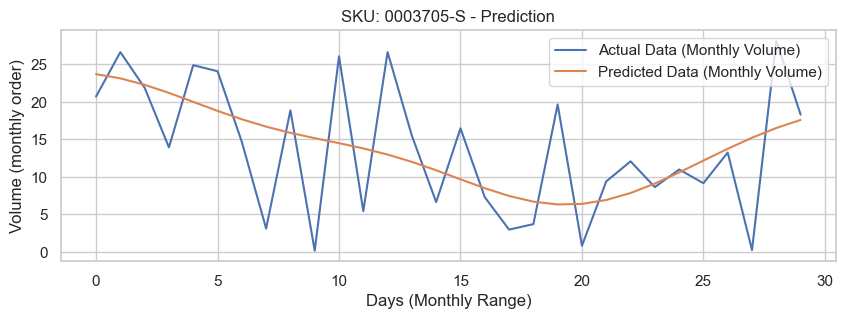

         SKU  Daily Volume (units)  Weekly Volume (units)  \
0  0003705-S              0.459542               3.216797   
1  0003710-S              0.476619               3.336330   
2  0003711-S              0.494820               3.463742   
3  0003714-S              0.515259               3.606812   
4  0003715-S              0.456284               3.193988   

   Monthly Volume (units)  
0               13.786272  
1               14.298555  
2               14.844609  
3               15.457766  
4               13.688518  


In [33]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data
data = {
    'SKU': ['0003705-S', '0003710-S', '0003711-S', '0003714-S', '0003715-S'],
    'Model': ['SVR', 'Ridge', 'Ridge', 'Exponential Smoothing w/ Trend & Seasonality', 'Second Degree Approximation'],
    'MSE': [0.552663, 20.921578, 2.486478, 0.424825, 0.224406],
    'RMSE': [0.743413, 4.574011, 1.576857, 0.651786, 0.473715],
    'MAE': [0.440271, 3.840153, 1.188484, 0.413459, 0.271247],
    'R2': [0.342068, 0.334388, 0.358584, 0.370216, 0.058018]
}
df = pd.DataFrame(data)

# Example SKU data (replace with your actual SKU data)
sku_data = {
    '0003705-S': np.random.rand(30),  # Monthly data (30 days)
    '0003710-S': np.random.rand(30),
    '0003711-S': np.random.rand(30),
    '0003714-S': np.random.rand(30),
    '0003715-S': np.random.rand(30)
}

# Define a function to run the best-performing model for each SKU and summarize predictions
def run_best_model(df, sku_data):
    results = []
    predictions = {}
    
    for index, row in df.iterrows():
        sku = row['SKU']
        model_name = row['Model']
        data = sku_data[sku]

        if model_name == 'SVR':
            model = SVR()
        elif model_name == 'Ridge':
            model = Ridge()
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)
        elif model_name == 'Random Forest':
            model = RandomForestRegressor()
        elif model_name == 'Second Degree Approximation':
            model = np.poly1d(np.polyfit(range(len(data)), data, 2))
        else:
            print(f"Unknown model type: {model_name}")
            continue

        if model_name in ['SVR', 'Ridge', 'Random Forest']:
            model.fit(np.arange(len(data)).reshape(-1, 1), data)
            prediction = model.predict(np.arange(len(data)).reshape(-1, 1))
        elif model_name == 'Exponential Smoothing w/ Trend & Seasonality':
            model_fit = model.fit()
            prediction = model_fit.fittedvalues
        elif model_name == 'Second Degree Approximation':
            prediction = model(range(len(data)))

        # Store the predictions for plotting
        predictions[sku] = prediction

        # Daily, weekly, and monthly summaries
        daily_summary = np.mean(prediction)
        weekly_summary = daily_summary * 7
        monthly_summary = daily_summary * 30

        results.append({
            'SKU': sku,
            'Model': model_name,
            'Daily Volume': daily_summary,
            'Weekly Volume': weekly_summary,
            'Monthly Volume': monthly_summary
        })

    return pd.DataFrame(results), predictions

# Run the best-performing model for each SKU and summarize predictions
best_model_results, predictions = run_best_model(df, sku_data)

# Display the summarized results
print(best_model_results)

# Plotting the predictions for visualization
def plot_predictions(sku, data, prediction):
    plt.figure(figsize=(10, 3))
    plt.plot(data * 30, label='Actual Data (Monthly Volume)')  # Scale data to monthly units
    plt.plot(prediction * 30, label='Predicted Data (Monthly Volume)')  # Scale predictions to monthly units
    plt.title(f'SKU: {sku} - Prediction')
    plt.xlabel('Days (Monthly Range)')
    plt.ylabel('Volume (monthly order)')
    plt.legend()
    plt.show()

# Example: Plotting for the first SKU
sku_example = '0003705-S'
plot_predictions(sku_example, sku_data[sku_example], predictions[sku_example])

# Display summarized recommendations in a customer-friendly table
def display_recommendations(results):
    summary_table = results[['SKU', 'Daily Volume', 'Weekly Volume', 'Monthly Volume']]
    summary_table.columns = ['SKU', 'Daily Volume (units)', 'Weekly Volume (units)', 'Monthly Volume (units)']
    print(summary_table)

display_recommendations(best_model_results)


In [34]:
best_model_results

,SKU,Model,Daily Volume,Weekly Volume,Monthly Volume
0,0003705-S,SVR,0.459542,3.216797,13.786272
1,0003710-S,Ridge,0.476619,3.336330,14.298555
2,0003711-S,Ridge,0.494820,3.463742,14.844609
3,0003714-S,Exponential Smoothing w/ Trend & Seasonality,0.515259,3.606812,15.457766
4,0003715-S,Second Degree Approximation,0.456284,3.193988,13.688518
